In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

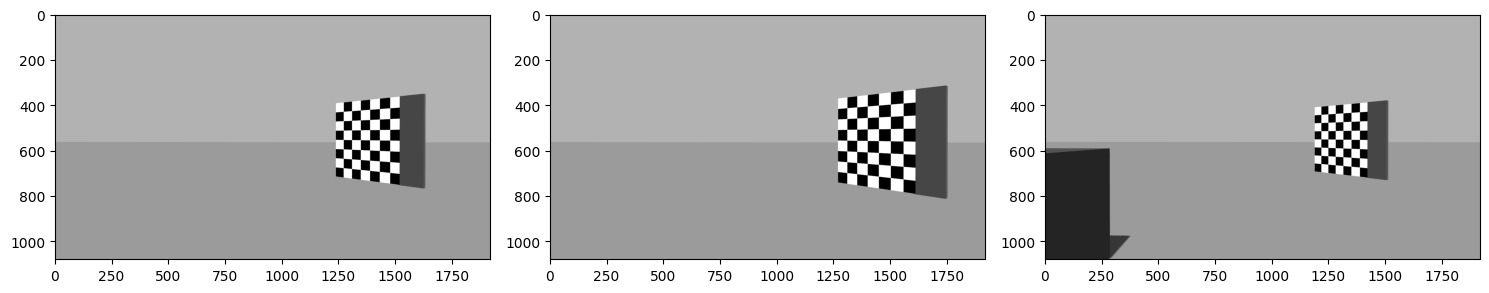

In [48]:
image_dir = '/home/kodogyu/swc_capstone/system_test/images/'

image00 = cv2.imread(image_dir + "image00.png", cv2.IMREAD_GRAYSCALE)
image01 = cv2.imread(image_dir + "image01.png", cv2.IMREAD_GRAYSCALE)
image02 = cv2.imread(image_dir + "image02.png", cv2.IMREAD_GRAYSCALE)
image03 = cv2.imread(image_dir + "image03.png", cv2.IMREAD_GRAYSCALE)
image04 = cv2.imread(image_dir + "image04.png", cv2.IMREAD_GRAYSCALE)

image00 = image03
image01 = image04

plt.figure(figsize=(15, 8))
plt.subplot(131)
plt.imshow(image00, cmap='gray')
plt.subplot(132)
plt.imshow(image01, cmap='gray')
plt.subplot(133)
plt.imshow(image02, cmap='gray')

plt.tight_layout()
plt.show()

In [49]:
ret, corners00 = cv2.findChessboardCorners(image00, (5, 7))
ret, corners01 = cv2.findChessboardCorners(image01, (5, 7))
ret, corners02 = cv2.findChessboardCorners(image02, (5, 7))

print(ret)
print(corners00.shape)
print(corners01.shape)
print(corners02.shape)

True
(35, 1, 2)
(35, 1, 2)
(35, 1, 2)


### Test

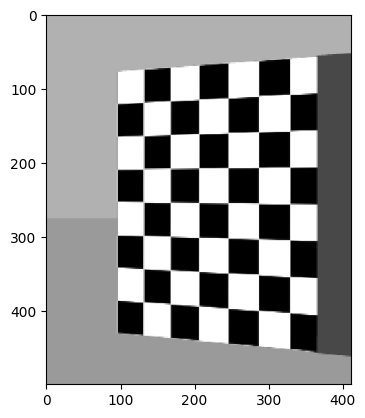

In [32]:
a = cv2.imread('/home/kodogyu/Pictures/1.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(a, cmap='gray')
plt.show()

In [41]:
_, corners_a = cv2.findChessboardCorners(a, (5, 7))

corners_a.shape

(35, 1, 2)

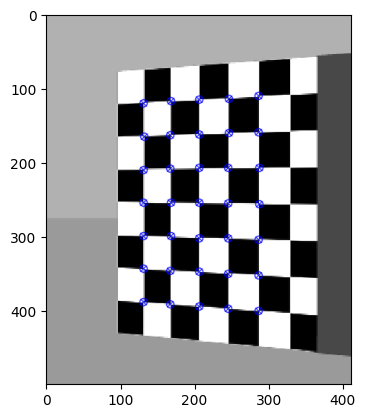

In [42]:
corner_image_a = a.copy()
corner_image_a = cv2.cvtColor(corner_image_a, cv2.COLOR_GRAY2RGB)

cv2.drawChessboardCorners(corner_image_a, (5, 7), corners_a, ret)

plt.imshow(corner_image_a)
plt.show()

##

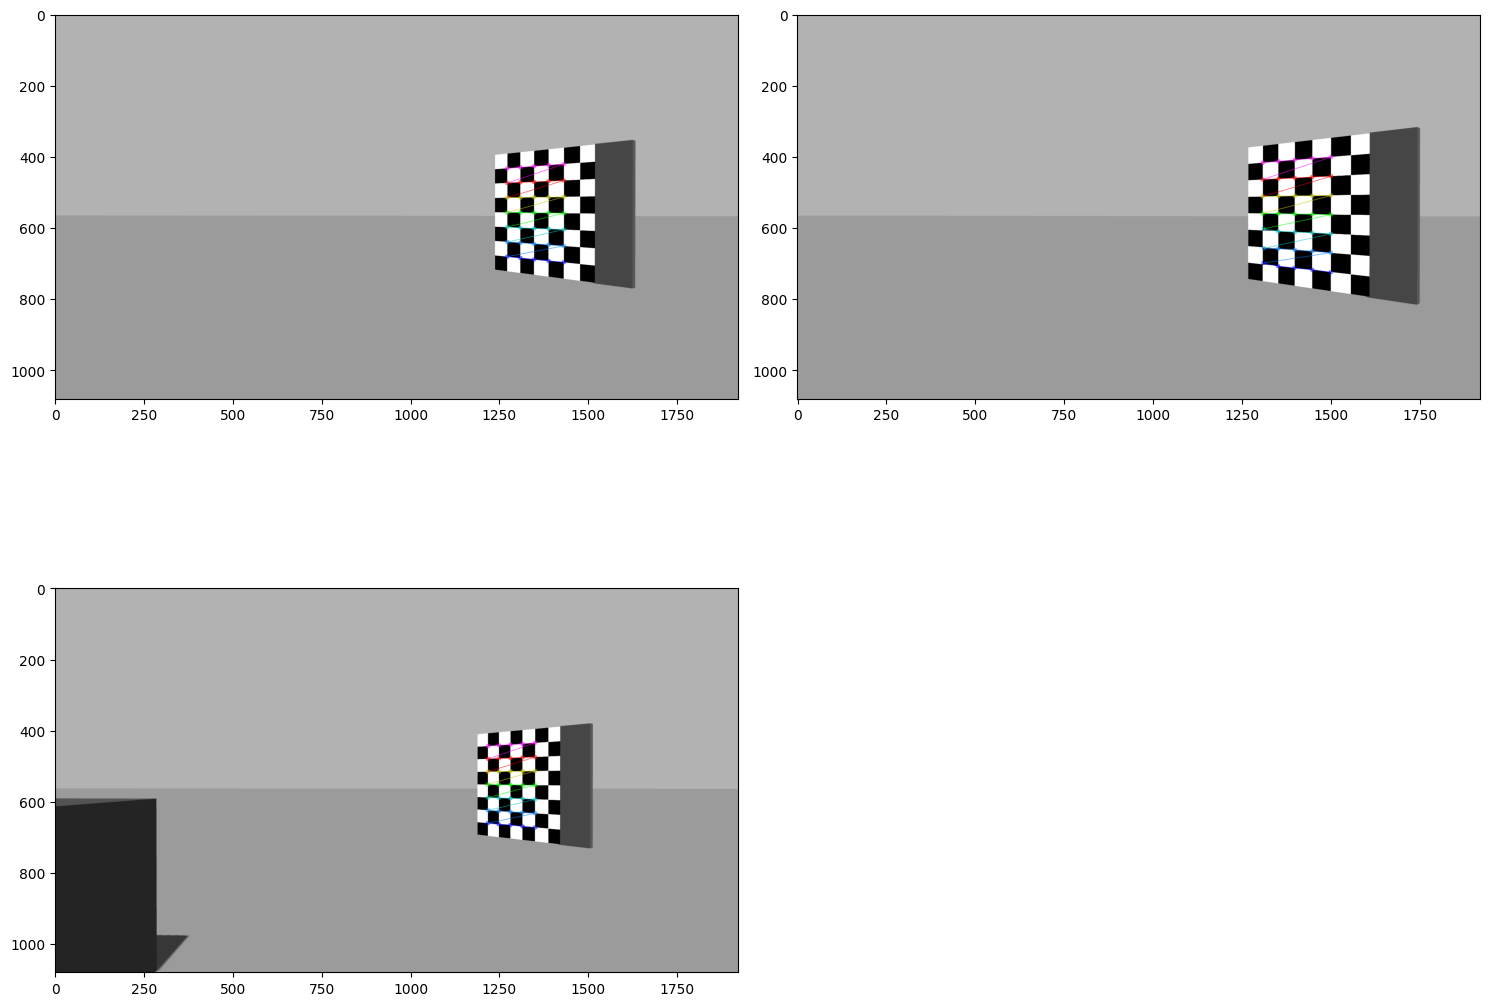

In [50]:
corner_image00 = image00.copy()
corner_image00 = cv2.cvtColor(corner_image00, cv2.COLOR_GRAY2RGB)
corner_image01 = image01.copy()
corner_image01 = cv2.cvtColor(corner_image01, cv2.COLOR_GRAY2RGB)
corner_image02 = image02.copy()
corner_image02 = cv2.cvtColor(corner_image02, cv2.COLOR_GRAY2RGB)

# for corner in corners00:
#     cv2.circle(corner_image00, tuple(corner[0].astype(np.int16)), 10, (255, 0, 0), 3)
# for corner in corners01:
#     cv2.circle(corner_image01, tuple(corner[0].astype(np.int16)), 10, (255, 0, 0), 3)
# for corner in corners02:
#     cv2.circle(corner_image02, tuple(corner[0].astype(np.int16)), 10, (255, 0, 0), 3)

cv2.drawChessboardCorners(corner_image00, (5, 7), corners00, ret)
cv2.drawChessboardCorners(corner_image01, (5, 7), corners01, ret)
cv2.drawChessboardCorners(corner_image02, (5, 7), corners02, ret)


plt.figure(figsize=(15, 12))
plt.subplot(221)
plt.imshow(corner_image00)
plt.subplot(222)
plt.imshow(corner_image01)
plt.subplot(223)
plt.imshow(corner_image02)

plt.tight_layout()
plt.show()

In [51]:
# Set the needed parameters to find the refined corners
winSize = (5, 5)
zeroZone = (-1, -1)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TermCriteria_COUNT, 40, 0.001)

# Calculate the refined corner locations
corners00_subpix = cv2.cornerSubPix(image00, corners00, winSize, zeroZone, criteria)
corners01_subpix = cv2.cornerSubPix(image01, corners01, winSize, zeroZone, criteria)
corners02_subpix = cv2.cornerSubPix(image02, corners02, winSize, zeroZone, criteria)

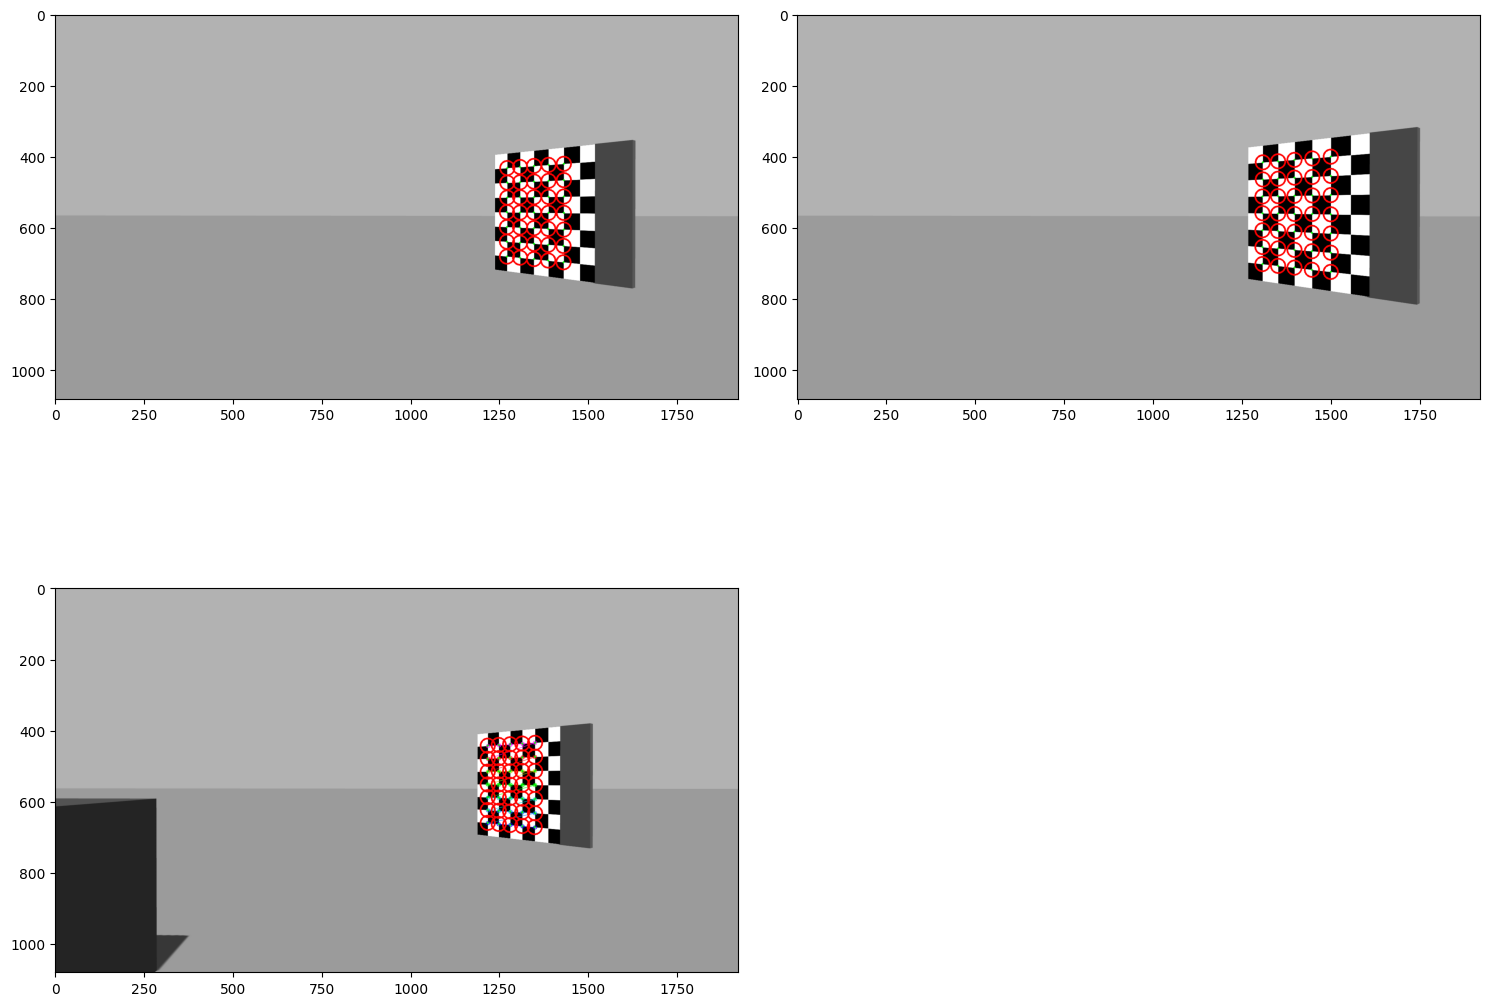

In [52]:
corner_image00 = image00.copy()
corner_image00 = cv2.cvtColor(corner_image00, cv2.COLOR_GRAY2RGB)
corner_image01 = image01.copy()
corner_image01 = cv2.cvtColor(corner_image01, cv2.COLOR_GRAY2RGB)

for corner in corners00_subpix:
    cv2.circle(corner_image00, tuple(corner[0].astype(np.int16)), 1, (0, 255, 0), 3)
    cv2.circle(corner_image00, tuple(corner[0].astype(np.int16)), 20, (255, 0, 0), 3)
for corner in corners01_subpix:
    cv2.circle(corner_image01, tuple(corner[0].astype(np.int16)), 1, (0, 255, 0), 3)
    cv2.circle(corner_image01, tuple(corner[0].astype(np.int16)), 20, (255, 0, 0), 3)
for corner in corners02_subpix:
    cv2.circle(corner_image02, tuple(corner[0].astype(np.int16)), 1, (0, 255, 0), 3)
    cv2.circle(corner_image02, tuple(corner[0].astype(np.int16)), 20, (255, 0, 0), 3)

plt.figure(figsize=(15, 12))
plt.subplot(221)
plt.imshow(corner_image00)
plt.subplot(222)
plt.imshow(corner_image01)
plt.subplot(223)
plt.imshow(corner_image02)

plt.tight_layout()
plt.show()